# 感知机算法实验

## 第 0 步：感知机算法

In [17]:
class Perceptron():
    '''
        This is a simple implementation of Perceptron algorithm
    '''
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.update_times_list = []
        self.error_rate_list = []

        for _ in range(self.epochs):
            update_times = 0
            for xi, yi in zip(X, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self.w[1:] +=  update * xi
                self.w[0] +=  update
                update_times += int(update != 0.0)
            self.update_times_list.append(update_times)
            self.error_rate_list.append((y != self.predict(X)).sum()/y.size)
        return self

    def predict(self, x):
        net_input = np.dot(x, self.w[1:]) + self.w[0]
        return np.where(net_input >= 0.0, 1, -1)

## 第 1 步：加载Iris数据集

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load dataset
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df['label'] = iris_dataset.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

## 第 2 步：构造两维二分类实验数据

In [19]:
# 实验参数：选择不同的实验数据（线性可分 vs. 线性不可分）
exp_type = 'linear inseparable'
if exp_type=='linear separable':
    exp_classes = ['setosa', 'versicolor']
    exp_features = ['sepal length (cm)', 'petal length (cm)']
elif exp_type=='linear inseparable':
    exp_classes = ['versicolor', 'virginica'] # 'setosa', 'versicolor', 'virginica'
    exp_features = ['sepal width (cm)', 'petal width (cm)'] # 'sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)'
else:
    print('Wrong experiment type!')
    sys.exit()

assert(len(exp_classes)==2 and set(exp_classes).issubset(set(iris_dataset.target_names)))
assert(len(exp_features)==2 and set(exp_features).issubset(set(iris_dataset.feature_names)))

In [20]:
# convert class and feature names into sample and feature indexes
class_id_set = [idx for idx in range(len(iris_dataset.target_names)) if iris_dataset.target_names[idx] in exp_classes]
sample_id_set = [idx for idx in range(len(iris_dataset.target)) if iris_dataset.target[idx] in class_id_set]
feature_id_set = [idx for idx in range(len(iris_dataset.feature_names)) if iris_dataset.feature_names[idx] in exp_features]

# classify setosa and versicolor by their sepal length and petal length
y = iris_dataset.target[sample_id_set]
y = np.where(y == class_id_set[0], -1, 1) 
X = iris_dataset.data[sample_id_set, :]
X = X[:, feature_id_set]

# split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 第 3 步：感知机模型训练与测试

In [21]:
# train Perceptron
# 实验参数：选择不同的迭代次数epochs和学习步长eta
ppn = Perceptron(epochs=100, learning_rate=0.01)
ppn.train(X_train, y_train)
print('Weights: %s' % ppn.w)

error_rate_on_training_set = (y_train != ppn.predict(X_train)).sum()/y_train.size
error_rate_on_test_set = (y_test != ppn.predict(X_test)).sum()/y_test.size
print('Error rates on training data vs. test data : \
    {:.2%} vs. {:.2%}'.format(error_rate_on_training_set, error_rate_on_test_set))

Weights: [-0.8   -0.236  1.   ]
Error rates on training data vs. test data :     8.75% vs. 10.00%


## 第 4 步： 结果输出

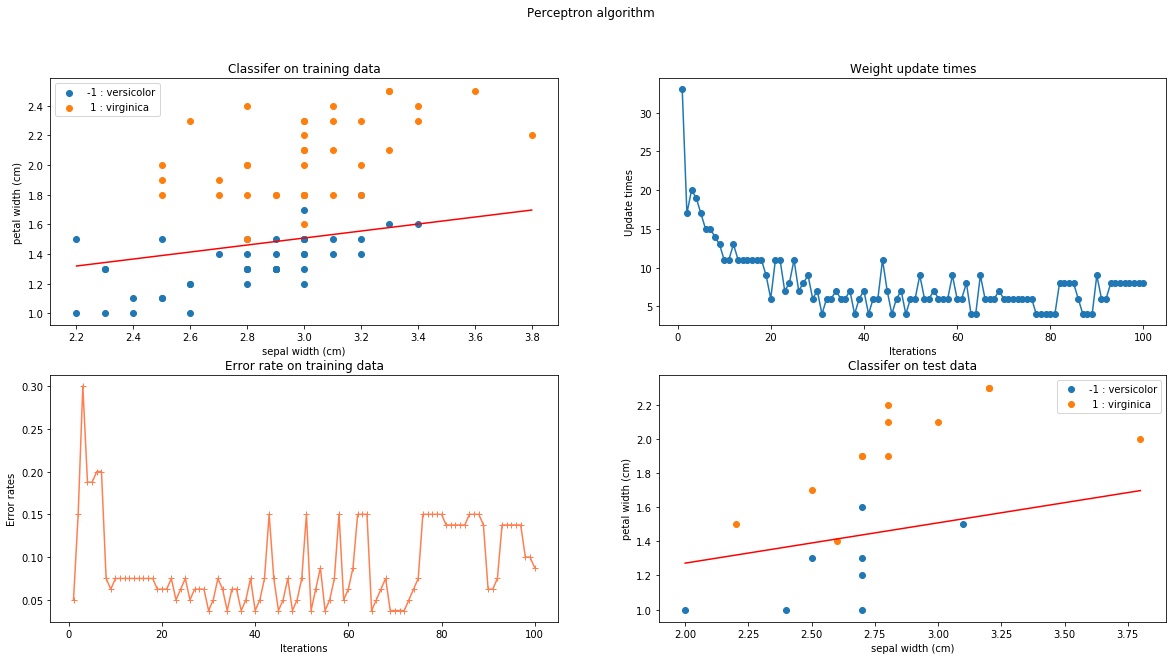

In [22]:
# draw results
plt.figure(figsize=(20,10))
plt.suptitle('Perceptron algorithm')

# subfigure 1: training samples and learned linear classifier
plt.subplot(2,2,1)
plt.title('Classifer on training data')
b = -ppn.w[0]/ppn.w[2]
a = -ppn.w[1]/ppn.w[2]
x = np.linspace(X_train[:,0].min(), X_train[:,0].max())
f = lambda x : a*x + b
plt.plot(x, f(x),'r')

plt.scatter(X_train[y_train==-1][:,0], X_train[y_train==-1][:,1], label='-1 : %s' % exp_classes[0])
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label=' 1 : %s' % exp_classes[1])
plt.xlabel(exp_features[0])
plt.ylabel(exp_features[1])
plt.legend()

# subfigure 2: weight update times in the training process
plt.subplot(2,2,2)
plt.title('Weight update times')
plt.plot(range(1, len(ppn.update_times_list)+1), ppn.update_times_list, marker='o', label='error times')
plt.xlabel('Iterations')
plt.ylabel('Update times')

# subfigure 3: change of error rate in the training process
plt.subplot(2,2,3)
plt.title('Error rate on training data')
plt.plot(range(1, len(ppn.error_rate_list)+1), ppn.error_rate_list, marker='+', color='coral', label='error rate')
plt.xlabel('Iterations')
plt.ylabel('Error rates')

# subfigure 4: test samples and learned linear classifier
plt.subplot(2,2,4)
plt.title('Classifer on test data')
x = np.linspace(X_test[:,0].min(), X_test[:,0].max())
plt.plot(x, f(x),'r')

plt.scatter(X_test[y_test==-1][:,0], X_test[y_test==-1][:,1], label='-1 : %s' % exp_classes[0])
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label=' 1 : %s' % exp_classes[1])
plt.xlabel(exp_features[0])
plt.ylabel(exp_features[1])
plt.legend()

plt.show()